In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize
import sys
sys.path.append("./util/plot")
from util.plot import plot_fn_2d, plot_segment

In [2]:
def paraboloid(x):
  return x[0]**2 + x[1]**2

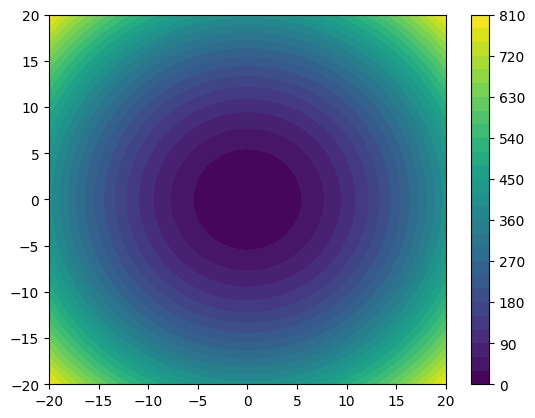

In [3]:
plot_fn_2d(paraboloid)

In [4]:
def find_zero(f, x):
  lo = -1e3
  hi = 1e3
  for _ in range(1000):
    mid = (lo + hi) / 2
    if f([x, mid]) > 0:
      hi = mid
    else:
      lo = mid
  return [x, lo]

In [5]:
def constraint1(x):
  return x[0] + x[1] - 5

def constraint2(x):
  return (0.5 * x[0]) + x[1] - 5

In [6]:
x0 = [400, 700]

cons1 = {'type': 'ineq', 'fun': constraint1}
cons2 = {'type': 'ineq', 'fun': constraint2}

result_without_constraints = optimize.minimize(paraboloid, x0)
result_constraints = optimize.minimize(paraboloid, x0, constraints=[cons1, cons2])

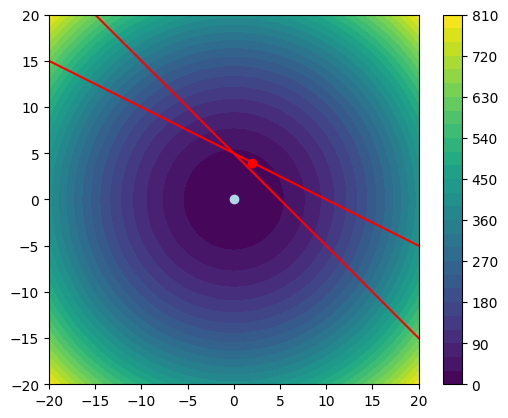

In [9]:
_, ax = plt.subplots()

ax.set_box_aspect(1)

plt.xlim(-20, 20)
plt.ylim(-20, 20)

plot_fn_2d(paraboloid)

plt.scatter(result_constraints.x[0], result_constraints.x[1], color='red')
plt.scatter(result_without_constraints.x[0], result_without_constraints.x[1], color='lightblue')

plot_segment(find_zero(constraint1, -20), find_zero(constraint1, 20))
plot_segment(find_zero(constraint2, -20), find_zero(constraint2, 20))